In [2]:
from utils import (adstock,decomposition,create_transformed_tables, calc_roi)
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# Display the full statsmodels summary output as preformatted text to avoid truncation in Jupyter
from IPython.display import display, Markdown

In [3]:

# Load data from the 'dataset' sheet, range B6:CY266, with 'Date' as the date column
df_data = pd.read_excel(
    'data/mock model.xlsx',
    sheet_name='DataSet',
    usecols='B:CZ',
    skiprows=5,
    nrows=261,
    parse_dates=['Date']
).set_index('Date')

# Add a random number column
df_data['random'] = np.random.rand(len(df_data))
sigma = 0.01
# df_data['error'] = 0
df_data['error'] = scipy.stats.norm.ppf(df_data['random'], loc=0, scale=sigma)

In [4]:
df_var_spec_all = pd.read_excel(
    'data/mock model.xlsx',
    sheet_name='EqnSpec',
    usecols='A:G',
) #.set_index('variable')

# Filter, rename 'Beta_Log' to 'Beta', and convert 'Log' column: only 1 is True, anything else is False
df_var_spec_all = df_var_spec_all.rename(columns={'beta_log': 'beta'})
df_var_spec = df_var_spec_all[df_var_spec_all['beta'].notnull()].copy()
df_var_spec['log'] = df_var_spec['log'] == 1
df_var_spec


,variable,beta,carryover,log,group,decomp_ref,spend_variable
0,C,1.200000e+01,NaN,False,base,NaN,NaN
2,D_JAN,-1.500000e-01,NaN,False,base,NaN,NaN
3,D_FEB,-1.000000e-01,NaN,False,base,NaN,NaN
4,D_MAR,8.000000e-02,NaN,False,base,NaN,NaN
5,D_APR,1.000000e-01,NaN,False,base,NaN,NaN
6,D_MAY,1.000000e-01,NaN,False,base,NaN,NaN
10,D_SEP,5.000000e-02,NaN,False,base,NaN,NaN
11,D_OCT,1.000000e-01,NaN,False,base,NaN,NaN
12,D_NOV,1.500000e-01,NaN,False,base,NaN,NaN
13,D_DEC,-2.000000e-01,NaN,False,base,NaN,NaN


In [5]:
df_trans, df_values = create_transformed_tables(df_data, df_var_spec,True)

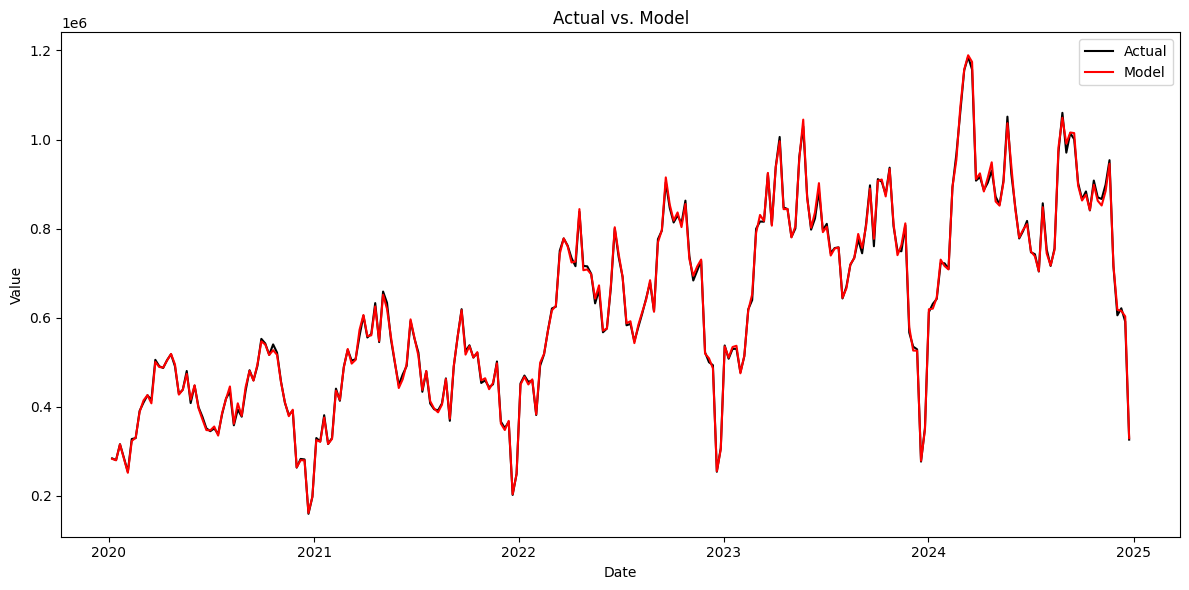

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_values.index, df_values['actual'], label='Actual', color='black')
plt.plot(df_values.index, df_values['model'], label='Model', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Model')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
df_decomp_vol = decomposition(df_var_spec,df_values)
price_col = 'Price_SE_XF'
df_decomp_val = df_decomp_vol.multiply(df_data[price_col], axis=0)

Check passed: True
Group sum check passed: True
Check passed: True


In [8]:
df_decomp_vol

,base,weather,econ,dist,price,promotion,m_Wow_TV,m_Wow_OLV,m_Wow_Social,m_Amaze_Tot,m_Celeb_TV,m_Celeb_Outdoor,m_Celeb_Display,comp,model,model_og,diff
Date,,,,,,,,,,,,,,,,,
2020-01-07,156389.547329,-2606.090142,0.000000,15138.826536,78147.876893,37368.771213,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,-1204.849831,283234.081999,283234.081999,-5.820766e-11
2020-01-14,157224.999374,-5514.030654,0.000000,15054.876083,77714.517695,37161.547404,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,-1475.151801,280166.758101,280166.758101,0.000000e+00
2020-01-21,167323.771957,5789.667192,0.000000,16675.959087,86082.682474,41163.038521,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,-1143.754191,315891.365040,315891.365040,5.820766e-10
2020-01-28,159746.320163,15815.461361,0.000000,15184.982367,78386.137117,16754.614406,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,-1735.486847,284152.028567,284152.028567,5.820766e-11
2020-02-04,172713.034937,-11869.443751,6062.590421,14149.738124,73042.120559,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,-2098.915812,251999.124478,251999.124478,-4.074536e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,673783.797835,-42174.389199,85744.362689,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.890653,0.000271,5.396114e-06,0.000000,717355.662254,717355.662254,-1.280569e-09
2024-12-03,548618.722458,-4203.832271,73446.644483,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.133643,0.000162,1.848637e-06,0.000000,617862.668477,617862.668477,-9.313226e-10
2024-12-10,548858.906114,-6528.498510,73201.737775,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.790904,0.000113,7.367711e-07,0.000000,615532.936398,615532.936398,-1.047738e-09


In [9]:
df_rois = calc_roi(df_decomp_val, df_var_spec, df_data)
df_rois

,variable,value,spend_sum,roi
0,m_Wow_TV,"4,471,876","2,699,491",1.66
1,m_Wow_OLV,"1,923,657","947,317",2.03
2,m_Wow_Social,"497,480","121,919",4.08
3,m_Amaze_Tot,"10,117,907","7,929,905",1.28
4,m_Celeb_TV,"8,590,703","2,828,021",3.04
5,m_Celeb_Outdoor,"3,712,733","1,290,619",2.88
6,m_Celeb_Display,"3,941,598","1,586,718",2.48
7,Total,"33,255,954","17,403,991",1.91


In [10]:
df_values

,C,D_JAN,D_FEB,D_MAR,D_APR,D_MAY,D_SEP,D_OCT,D_NOV,D_DEC,...,m_Wow_OLV,m_Wow_Social,m_Amaze_Tot,m_Celeb_TV,m_Celeb_Outdoor,m_Celeb_Display,comp_Lor_Tot,comp_no7_Tot,model,actual
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-07,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.001977,-0.002056,283234.081999,284405.855724
2020-01-14,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.002312,-0.002700,280166.758101,280394.508150
2020-01-21,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000437,-0.002958,315891.365040,316182.792754
2020-01-28,12.0,-0.085714,-0.042857,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.001292,-0.004492,284152.028567,285691.892495
2020-02-04,12.0,-0.000000,-0.100000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.005062,-0.003191,251999.124478,254111.036372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.085714,-0.085714,...,5.513038e-43,2.638285e-61,2.748996e-23,2.619028e-06,3.747898e-10,7.475204e-12,-0.000000,-0.000000,717355.662254,715377.167182
2024-12-03,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.200000,...,3.307823e-43,1.319143e-61,1.924297e-23,1.833320e-06,2.623529e-10,2.990082e-12,-0.000000,-0.000000,617862.668477,605458.586934
2024-12-10,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.200000,...,1.984694e-43,6.595713e-62,1.347008e-23,1.283324e-06,1.836470e-10,1.196033e-12,-0.000000,-0.000000,615532.936398,621276.617950


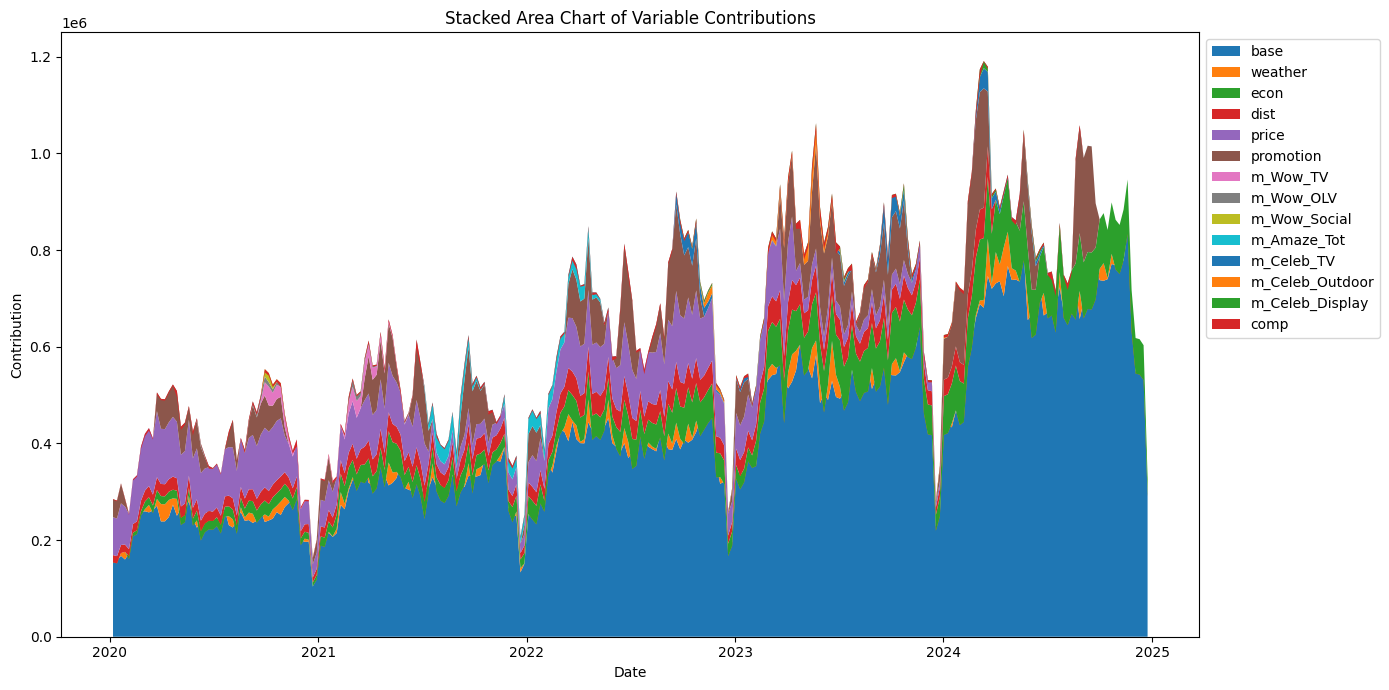

In [11]:
# Stacked area chart of all variables in df_decomp_vol except model, model_og, diff
exclude_cols = ['model', 'model_og', 'diff']
area_cols = [col for col in df_decomp_vol.columns if col not in exclude_cols]
plt.figure(figsize=(14, 7))
plt.stackplot(df_decomp_vol.index, [df_decomp_vol[col] for col in area_cols], labels=area_cols)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Stacked Area Chart of Variable Contributions')
plt.xlabel('Date')
plt.ylabel('Contribution')
plt.tight_layout()
plt.show()

In [12]:
# Interactive stacked area chart of all variables in df_decomp_vol except model, model_og, diff using plotly
import plotly.graph_objects as go
exclude_cols = ['model', 'model_og', 'diff']
area_cols = [col for col in df_decomp_vol.columns if col not in exclude_cols]
fig = go.Figure()
for col in area_cols:
    fig.add_trace(go.Scatter(x=df_decomp_vol.index, y=df_decomp_vol[col], mode='lines', stackgroup='one', name=col))
fig.update_layout(title='Stacked Area Chart of Variable Contributions (Interactive)',
                  xaxis_title='Date', yaxis_title='Contribution',
                  legend_title='Variable',
                  hovermode='x unified',
                  height=600, width=1000)
fig.show()

In [13]:
df_trans

,C,D_JAN,D_FEB,D_MAR,D_APR,D_MAY,D_SEP,D_OCT,D_NOV,D_DEC,...,POS_FSDU,m_Wow_TV,m_Wow_OLV,m_Wow_Social,m_Amaze_Tot,m_Celeb_TV,m_Celeb_Outdoor,m_Celeb_Display,comp_Lor_Tot,comp_no7_Tot
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-07,1,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,98831,102788
2020-01-14,1,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,115621,135015
2020-01-21,1,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,21858,147920
2020-01-28,1,0.571429,0.428571,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,64577,224597
2020-02-04,1,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,253117,159572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.571429,0.428571,...,0.0,1.504678e-24,2.756519e-36,5.276570e-55,3.054440e-16,21.825236,0.003123,3.737602e-05,0,0
2024-12-03,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.0,1.053275e-24,1.653912e-36,2.638285e-55,2.138108e-16,15.277665,0.002186,1.495041e-05,0,0
2024-12-10,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.0,7.372923e-25,9.923469e-37,1.319143e-55,1.496675e-16,10.694366,0.001530,5.980164e-06,0,0


In [14]:
df_values

,C,D_JAN,D_FEB,D_MAR,D_APR,D_MAY,D_SEP,D_OCT,D_NOV,D_DEC,...,m_Wow_OLV,m_Wow_Social,m_Amaze_Tot,m_Celeb_TV,m_Celeb_Outdoor,m_Celeb_Display,comp_Lor_Tot,comp_no7_Tot,model,actual
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-07,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.001977,-0.002056,283234.081999,284405.855724
2020-01-14,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.002312,-0.002700,280166.758101,280394.508150
2020-01-21,12.0,-0.150000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000437,-0.002958,315891.365040,316182.792754
2020-01-28,12.0,-0.085714,-0.042857,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.001292,-0.004492,284152.028567,285691.892495
2020-02-04,12.0,-0.000000,-0.100000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.005062,-0.003191,251999.124478,254111.036372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.085714,-0.085714,...,5.513038e-43,2.638285e-61,2.748996e-23,2.619028e-06,3.747898e-10,7.475204e-12,-0.000000,-0.000000,717355.662254,715377.167182
2024-12-03,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.200000,...,3.307823e-43,1.319143e-61,1.924297e-23,1.833320e-06,2.623529e-10,2.990082e-12,-0.000000,-0.000000,617862.668477,605458.586934
2024-12-10,12.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.200000,...,1.984694e-43,6.595713e-62,1.347008e-23,1.283324e-06,1.836470e-10,1.196033e-12,-0.000000,-0.000000,615532.936398,621276.617950


In [15]:
# List variables in df_trans for regression
regression_vars = list(df_trans.columns)

import statsmodels.api as sm
X = df_trans[regression_vars].fillna(0)
y = np.log(df_values['actual'])
model = sm.OLS(y, X).fit()

summary_text = model.summary().as_text()
display(Markdown(f'```{summary_text}```'))

```                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.091e+04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        08:57:39   Log-Likelihood:                 850.59
No. Observations:                 260   AIC:                            -1631.
Df Residuals:                     225   BIC:                            -1507.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C                      11.6942      0.223     52.331      0.000      11.254      12.135
D_JAN                  -0.1461      0.003    -48.178      0.000      -0.152      -0.140
D_FEB                  -0.0974      0.003    -31.716      0.000      -0.103      -0.091
D_MAR                   0.0826      0.003     27.309      0.000       0.077       0.089
D_APR                   0.1038      0.004     28.379      0.000       0.097       0.111
D_MAY                   0.1054      0.003     35.716      0.000       0.100       0.111
D_SEP                   0.0458      0.003     15.362      0.000       0.040       0.052
D_OCT                   0.1052      0.004     29.019      0.000       0.098       0.112
D_NOV                   0.1536      0.003     52.973      0.000       0.148       0.159
D_DEC                  -0.1959      0.003    -59.052      0.000      -0.202      -0.189
SCHOOL_EASTER          -0.0555      0.006     -9.226      0.000      -0.067      -0.044
SCHOOL_HT_FEB          -0.0428      0.007     -5.774      0.000      -0.057      -0.028
SCHOOL_HT_MAY          -0.0655      0.007     -9.756      0.000      -0.079      -0.052
SCHOOL_HT_OCT          -0.0415      0.007     -5.546      0.000      -0.056      -0.027
PAYDAY_25               0.0780      0.002     49.170      0.000       0.075       0.081
BH_NY                  -0.4964      0.005    -92.258      0.000      -0.507      -0.486
BH_XMAS                -0.7082      0.005   -130.007      0.000      -0.719      -0.697
DAY_VALENTINE           0.2482      0.002    155.303      0.000       0.245       0.251
WW_NAT_DLTA_MAXTEMP     0.0103      0.000     27.941      0.000       0.010       0.011
WW_NAT_DLTA_RAIN       -0.0195      0.001    -36.812      0.000      -0.021      -0.018
WW_NAT_DLTA_SUN         0.0098      0.001     15.527      0.000       0.009       0.011
RSI_NFOOD_VOL_SA        1.0597      0.049     21.720      0.000       0.964       1.156
Dist_XF                 0.8846      0.042     21.209      0.000       0.802       0.967
Price_SE_XF            -1.7881      0.030    -59.123      0.000      -1.848      -1.729
Prom_TFT                0.1503      0.002     81.317      0.000       0.147       0.154
POS_FSDU                0.1018      0.002     45.283      0.000       0.097       0.106
m_Wow_TV             1.132e-07   1.06e-08     10.643      0.000    9.22e-08    1.34e-07
m_Wow_OLV            2.433e-07   3.98e-08      6.111      0.000    1.65e-07    3.22e-07
m_Wow_Social         5.384e-07   1.28e-07      4.201      0.000    2.86e-07    7.91e-07
m_Amaze_Tot           9.08e-08   3.36e-09     27.053      0.000    8.42e-08    9.74e-08
m_Celeb_TV           1.005e-07    1.1e-08      9.102      0.000    7.87e-08    1.22e-07
m_Celeb_Outdoor      9.751e-08   1.51e-08      6.464      0.000    6.78e-08    1.27e-07
m_Celeb_Display      2.344e-07   6.16e-08      3.806      0.000    1.13e-07    3.56e-07
comp_Lor_Tot        -1.677e-08   4.36e-09     -3.845      0.000   -2.54e-08   -8.17e-09
comp_no7_Tot        -2.872e-08   4.59e-09     -6.252      0.000   -3.78e-08   -1.97e-08
==============================================================================
Omnibus:                        3.768   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.710
Skew:                          -0.292   Prob(JB):                        0.156
Kurtosis:                       2.968   Cond. No.                     1.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.```

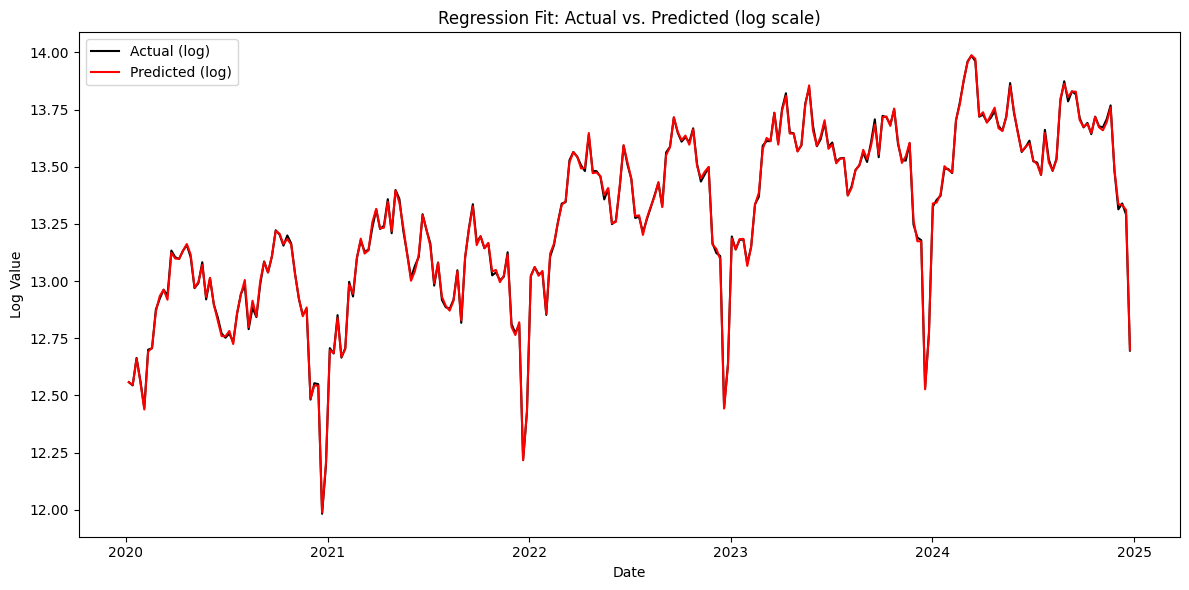

In [16]:
# Chart the fit of the regression: actual vs. predicted
y_pred = model.predict(sm.add_constant(df_trans[regression_vars].fillna(0)))
plt.figure(figsize=(12, 6))
plt.plot(df_values.index, y, label='Actual (log)', color='black')
plt.plot(df_values.index, y_pred, label='Predicted (log)', color='red', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Log Value')
plt.title('Regression Fit: Actual vs. Predicted (log scale)')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# coefs = pd.Series(model.params, index=model.params.index)
df_var_spec2 = df_var_spec.copy()
df_var_spec2['beta'] = df_var_spec2['variable'].map(model.params)


In [18]:
df_trans2, df_values2 = create_transformed_tables(df_data, df_var_spec2, True)

df_decomp_vol2 = decomposition(df_var_spec2,df_values2)
price_col = 'Price_SE_XF'
df_decomp_val2 = df_decomp_vol2.multiply(df_data[price_col], axis=0)
df_rois2 = calc_roi(df_decomp_val2, df_var_spec2, df_data)

Check passed: True
Group sum check passed: True
Check passed: True


In [19]:
# Append roi from df_rois2 to df_rois as a new column 'roi (est)', matching on variable
df_rois_merged = df_rois.copy()
if 'roi' in df_rois2.columns:
    df_rois_merged = df_rois_merged.merge(df_rois2[['variable', 'roi']], on='variable', how='left', suffixes=('', '_est'))
    df_rois_merged = df_rois_merged.rename(columns={'roi_est': 'roi (est)'})
else:
    print('roi column not found in df_rois2')
df_rois_merged

# Add a % change (est/actual) column to df_rois_merged, formatted to 2 decimal places
df_rois_merged2 = df_rois_merged.copy()
def pct_change(row):
    try:
        actual = float(row['roi'].replace(',', '')) if isinstance(row['roi'], str) else float(row['roi'])
        est = float(row['roi (est)'].replace(',', '')) if isinstance(row['roi (est)'], str) else float(row['roi (est)'])
        if pd.notnull(actual) and pd.notnull(est) and actual != 0:
            return f"{100 * (est - actual) / actual:.2f}%"
        else:
            return ''
    except Exception:
        return ''
df_rois_merged2['% change (est/actual)'] = df_rois_merged2.apply(pct_change, axis=1)
df_rois_merged2

,variable,value,spend_sum,roi,roi (est),% change (est/actual)
0,m_Wow_TV,"4,471,876","2,699,491",1.66,1.57,-5.42%
1,m_Wow_OLV,"1,923,657","947,317",2.03,2.47,21.67%
2,m_Wow_Social,"497,480","121,919",4.08,4.42,8.33%
3,m_Amaze_Tot,"10,117,907","7,929,905",1.28,1.29,0.78%
4,m_Celeb_TV,"8,590,703","2,828,021",3.04,2.54,-16.45%
5,m_Celeb_Outdoor,"3,712,733","1,290,619",2.88,2.34,-18.75%
6,m_Celeb_Display,"3,941,598","1,586,718",2.48,2.91,17.34%
7,Total,"33,255,954","17,403,991",1.91,1.85,-3.14%


In [20]:
# Save key DataFrames as CSVs in the results folder
import os
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

df_data.to_csv(os.path.join(results_dir, 'data.csv'))
df_var_spec.to_csv(os.path.join(results_dir, 'var_spec.csv'), index=False)
df_var_spec2.to_csv(os.path.join(results_dir, 'var_spec2.csv'), index=False)
df_decomp_vol.to_csv(os.path.join(results_dir, 'decomp.csv'))
df_decomp_vol2.to_csv(os.path.join(results_dir, 'decomp2.csv'))
df_rois_merged2.to_csv(os.path.join(results_dir, 'Rois.csv'), index=False)

In [21]:
df_var_spec

,variable,beta,carryover,log,group,decomp_ref,spend_variable
0,C,1.200000e+01,NaN,False,base,NaN,NaN
2,D_JAN,-1.500000e-01,NaN,False,base,NaN,NaN
3,D_FEB,-1.000000e-01,NaN,False,base,NaN,NaN
4,D_MAR,8.000000e-02,NaN,False,base,NaN,NaN
5,D_APR,1.000000e-01,NaN,False,base,NaN,NaN
6,D_MAY,1.000000e-01,NaN,False,base,NaN,NaN
10,D_SEP,5.000000e-02,NaN,False,base,NaN,NaN
11,D_OCT,1.000000e-01,NaN,False,base,NaN,NaN
12,D_NOV,1.500000e-01,NaN,False,base,NaN,NaN
13,D_DEC,-2.000000e-01,NaN,False,base,NaN,NaN
